# Case study on Wine Quality Prediction

## Problem Statement

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

### Objective

The objective of this case study is to assess wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository. The wine dataset is a classic and very easy multi-class classification dataset.

### Attributes

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

## Number of Instances: red wine - 1599; white wine - 4898. 

  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):12 - quality (score between 0 and 10)




### Table of Content

1.Import Libraries

2.Setting options

3.Read Data

4.Data Analysis and Preparation

4.1 - Understanding the Dataset
4.1.1 - Data Types

4.1.2 - Summary Statistics

4.1.3 - Missing Value check

4.1.4 - Discover Outliers with Visualization

5.Univariate Analysis


6.Multivariate Analysis 6.1 - Visualizing features having strongest relation with target variable


7.Creating Decision Tree Model


8.Regularizing and Pruning Decision Tree

9.Feature Importance


9.Conclusion and Interpretation



### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

### Setting options

In [170]:
#Suppress display of warnings
warnings.filterwarnings('ignore')

### Reading data

In [171]:
df = pd.read_csv('winequality-red.csv', sep = ';')

### Data Analysis and Data Preparation

In [172]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [174]:
#Checking the dimension
df.shape

(1599, 12)

In [175]:
#Checking the attributes
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [176]:
#Checking the datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [177]:
#Summary Statistics
df.describe().transpose()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [178]:
#Checking NULL values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Duplicate Value Treatment

In [179]:
#Checking duplicate values
df.duplicated().sum()

240

There are duplicate values in the dataset. Lets treat them. But before that we will make a copy of original data.

In [180]:
#Making copy of original dataset
df1 = df.copy(deep= True)

In [181]:
#Dropping duplicates
df1.drop_duplicates(inplace= True)

In [182]:
#Checking again 
df1.duplicated().sum()

0

### Checking Outliers

In [183]:
# df1.boxplot(figsize=(12,5),color= 'green')

In [184]:
# df1.columns

In [185]:
# # #Number of outliers
#  col_val = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#         'pH', 'sulphates', 'alcohol', 'quality']

# for i in col_val:
#      print('No. of outliers in {} is {}'.format(i, df1[((df1[i]-df1[i].mean())/df1[i].std()).abs() > 3][i].count()))

There are lot of ouliers in this dataset. Lets treat them

In [186]:
# #Lets impute outliers with Median
# for i in col_val:
#     Q1 = df1[i].quantile(0.25)
#     Q3 = df1[i].quantile(0.75)
#     IQR = Q3 - Q1
    
#     low = Q1 - 1.5*IQR
#     high = Q3 + 1.5*IQR
#     df1.loc[(df1[i] < low) | (df1[i] > high),i] = df1[i].median()

In [187]:
# #Number of outliers
# col_val = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol', 'quality']


# for i in col_val:
#     print('No. of outliers in {} is {}'.format(i, df1[((df1[i]-df1[i].mean())/df1[i].std()).abs() > 3][i].count()))

We have treated outliers.

### Univariate Analysis

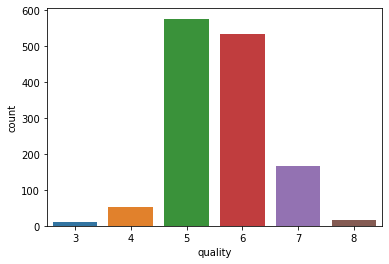

In [188]:
sns.countplot(df1['quality'])

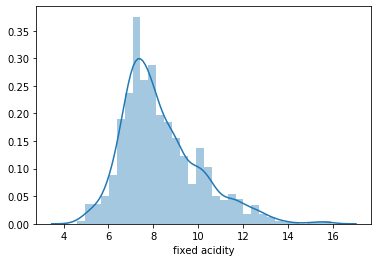

In [189]:
sns.distplot(df['fixed acidity'])

In [190]:
df1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

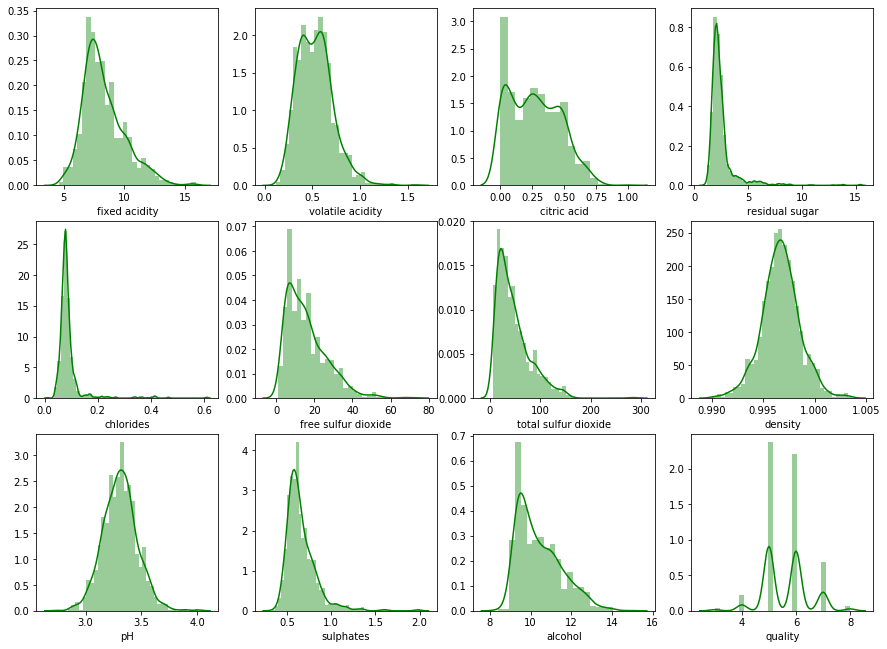

In [191]:
Cols = col_val = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality']
pos =1
plt.figure(figsize=(15,15))
for i in Cols:
    plt.subplot(4,4,pos)
    sns.distplot(df1[i],hist=True,color='green')
    pos+=1


Fixed acidity - Normal Distribution

volatile acidity - Bimodal Distribution

citric_acid - multiple peaks

residual sugar - Right Skewed

chlorides - Right Skewed

free sulfur dioxide - Right Skewed

total sulfur dioxide - Right Skewed

density - Normally distributed

pH - Normally distributed

sulphates - Right Skewed 

alcohol - Right Skewed

quality - multiple peaks as it has multiple classes

### Multivaraiate Analysis

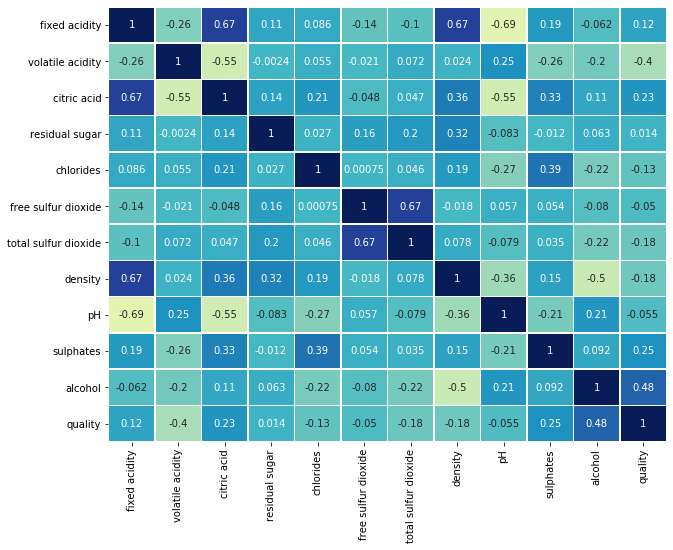

In [193]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

There are no multi-collinearity in this dataset.

In [194]:
df1['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

There are multiple classes in this dataset. Lets club them.

In [195]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
df1['quality'] = df1['quality'].replace(8,7)
df1['quality'] = df1['quality'].replace(3,5)
df1['quality'] = df1['quality'].replace(4,5)
df1['quality'].value_counts()

5    640
6    535
7    184
Name: quality, dtype: int64

### Splitting dataset

In [196]:
#splitting the dataset into train and test in 70:30 ratio
X_train, X_test, y_train, y_test =train_test_split(df1.drop('quality',axis=1), df1['quality'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((1019, 11), (340, 11))

### Creating Model

#### Create decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [197]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

print('Score on train data',dt.score(X_train,y_train))
print('Score on test data', dt.score(X_test,y_test))

Score on train data 1.0
Score on test data 0.5088235294117647


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [198]:
pr = DecisionTreeClassifier(criterion = "entropy", random_state= 100, max_depth =3, min_samples_leaf=5)
pr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### Visualizing the tree

We need to install pydotplus and graphviz packages for visualising the tree

In [199]:
! pip install Graphviz

In [200]:
! pip install pydotplus

In [201]:
! pip install six

In [202]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz

xvar = df1.drop('quality', axis=1)
feature_cols = xvar.columns

In [203]:
# dot_data = StringIO()
# export_graphviz(pr, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['5','6','7'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('wines_pruned.png')
# Image(graph.create_png())

In [205]:
# Creating pruned object
preds_pruned_test = pr.predict(X_test)
preds_pruned_train = pr.predict(X_train)

In [209]:
print(accuracy_score(y_test,preds_pruned_test))
print(accuracy_score(y_train,preds_pruned_train))

0.5941176470588235
0.620215897939156


In [210]:
acc_DT = accuracy_score(y_test, preds_pruned_test)

When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

### Feature Importance

In [214]:
#Calculating feature importance

feat_importance = pr.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, pr.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
alcohol               0.599093
volatile acidity      0.170399
sulphates             0.112619
total sulfur dioxide  0.076160
fixed acidity         0.041728
citric acid           0.000000
residual sugar        0.000000
chlorides             0.000000
free sulfur dioxide   0.000000
density               0.000000
pH                    0.000000

From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [215]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.594118

### Conclusion and Interpretation

We can see that decision tree is giving 56% of accuracy.